### Machine Learning CIS4035-N-FJ1-2020
### YU SHING LUI
### a0201746@tees.ac.uk

# Data Analysis on Predicting Churn for Bank Customers

#### Data Source: https://www.kaggle.com/shrutimechlearn/churn-modelling

In [3]:
#Mathematical operations
import numpy as np

#Data manipulation
import pandas as pd

#Data visulaization 
import matplotlib.pyplot as plt
import seaborn as sns

#Scaling, for standardizatiom
from sklearn. preprocessing import StandardScaler, MinMaxScaler

#Splitting data libraries and finding the best parameters
from sklearn.model_selection import train_test_split, GridSearchCV

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Finding accuracy score, confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

#Logistic Regression for calssification
from sklearn.linear_model import LogisticRegression

#Evaluate a model
from sklearn.metrics import classification_report

#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
#Loading the dataset

dataset = pd.read_csv('churn_for_bank_customers.csv')

df = pd.DataFrame(dataset)

In [5]:
#Showing how many rows and columns in the dataset

df.shape

(10000, 14)

##### There are 10,000 rows and 14 columns

In [6]:
#Showing the first five rows of data

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Features for the dataset

##### RowNumber — the row number 
##### CustomerId — unique number for the customer in the bank
##### Surname — the surname of a customer
##### CreditScore — how many credit score for the customer
##### Geography — the customer's location
##### Gender — Male or Female for the customer
##### Age - how old for the customer
##### Tenure — number of years for the customer using for the bank
##### Balance - how much money the customer has in the bank
##### NumOfProducts - the number of products the customer has in the bank
##### HasCrCard - does the customer has credit card or not
##### IsActiveMember - is it the active user in the bank
##### EstimatedSalary - how much the customer earns
##### Exited - the customer left the bank or not#

In [8]:
#Looking for the type of each attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
#Checking any missing data in the dataset

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#Exploratory dataset

round(df.describe(),2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


##### Understading the descriptive statistics from the dataset 

##### CreditScore: the range of credit score is from 350 to 850

##### Age: the range of customer’s age is from 18 to 92

##### Tenure: average a customer uses the bank over 5 years

##### NumOfProducts: overall most of customers has over one product in the bank

##### IsActiveMember: average over 50% of customers are still activating an account

##### Exited: around 20% customers exited a bank

In [12]:
#Drop those three columns as it is not necessary for analysing the dataset

df_edit=df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [13]:
# Changing categorical values to numerical and avoiding dummy variable

df_edit_final = pd.get_dummies(df_edit, drop_first=True)

df_edit_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


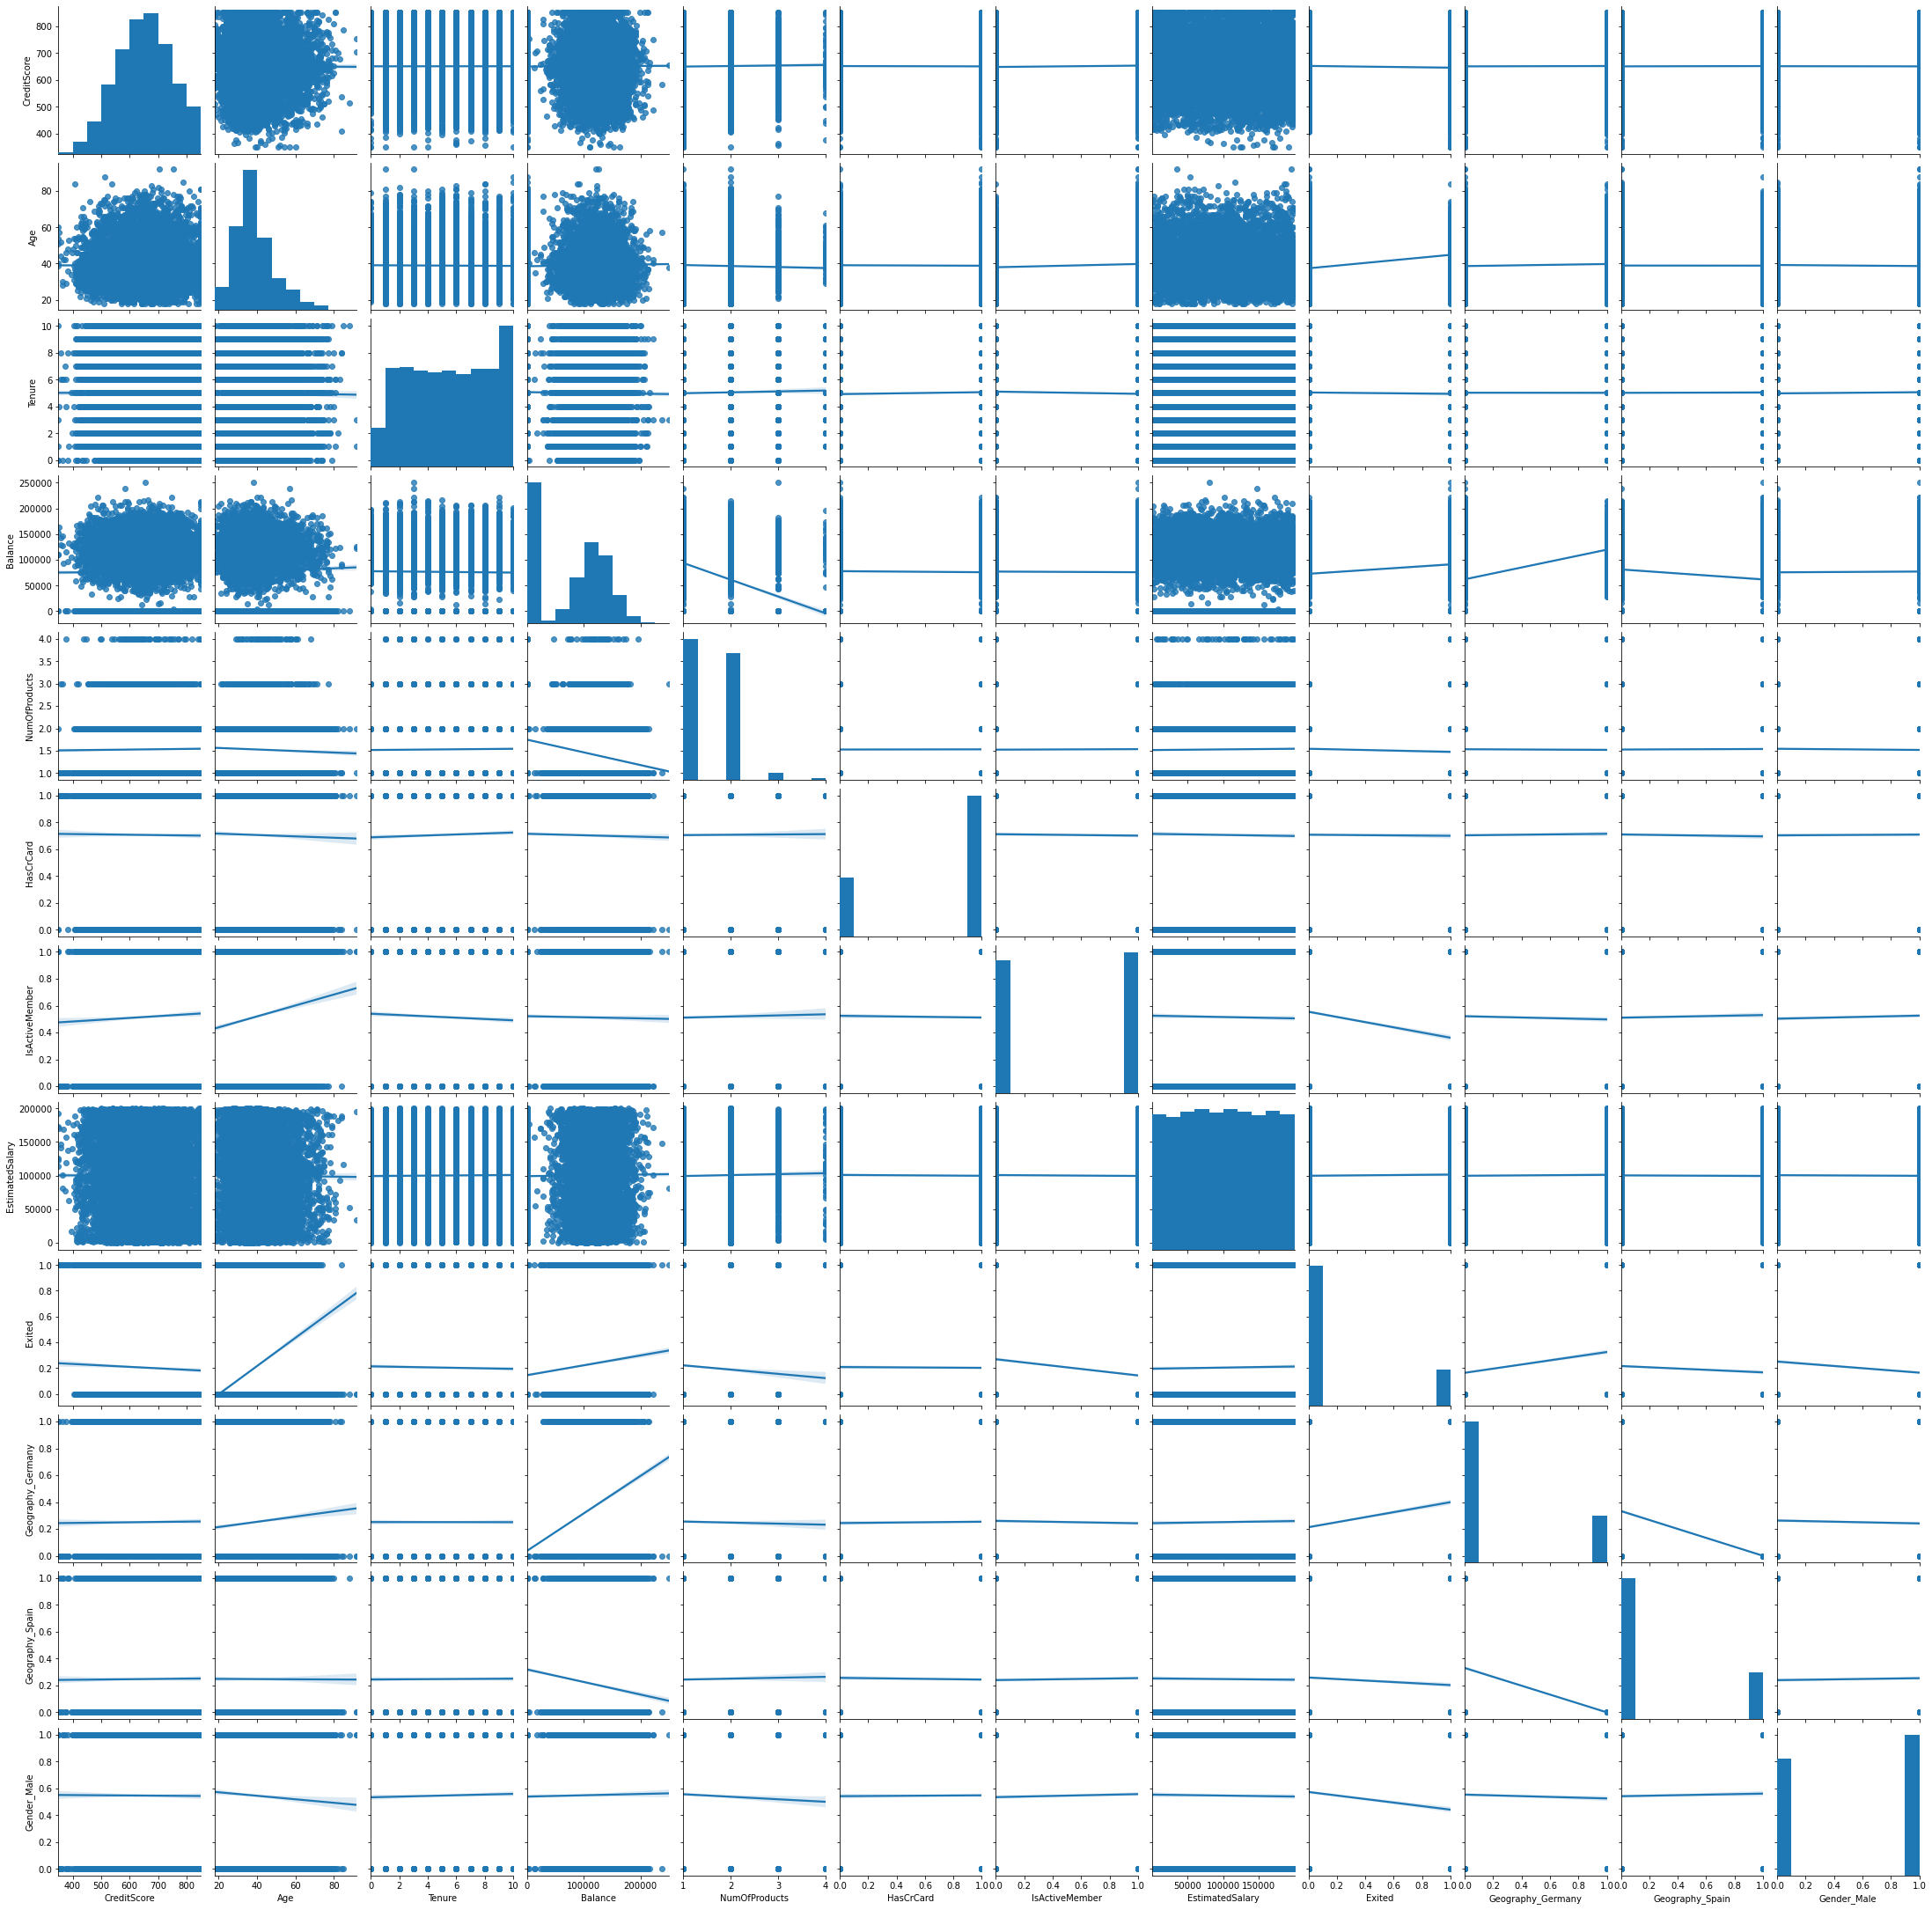

In [14]:
# finding the relationsip about the features

sns.pairplot(df_edit_final, kind='reg')

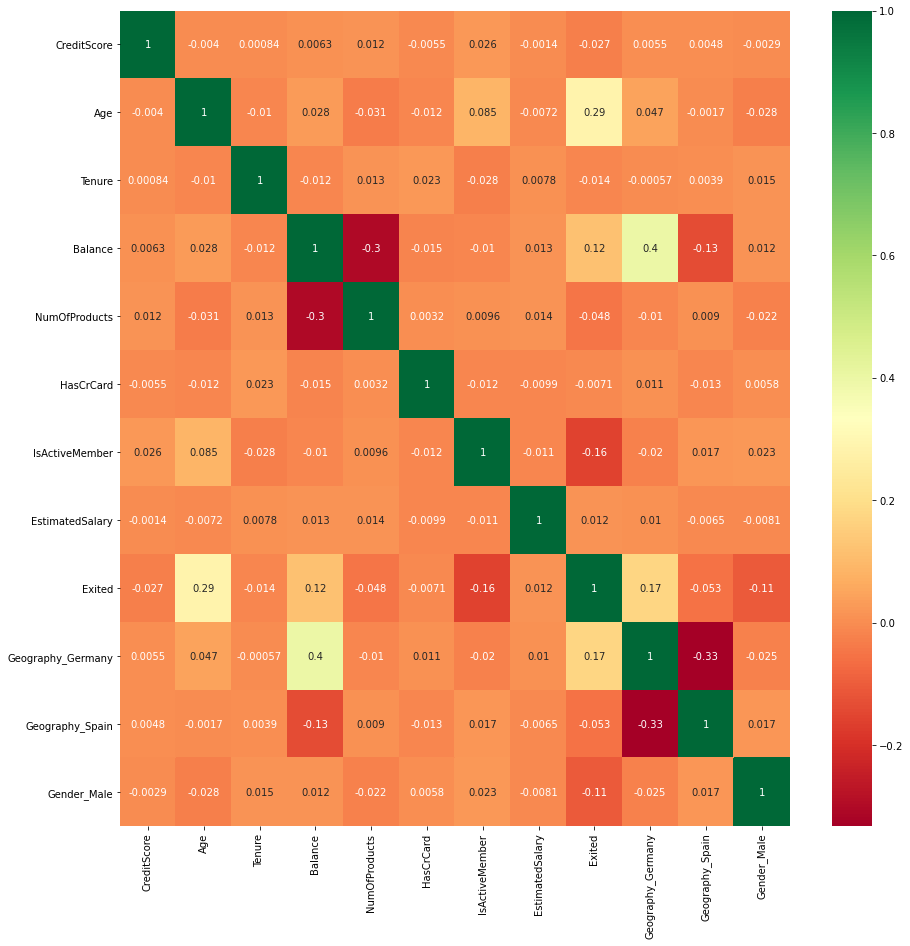

In [15]:
#Finding the correlations cross with the features

df_corr = df_edit_final.corr()
features = df_corr.index
plt.figure(figsize=(15,15))
sns.heatmap(df_edit_final[features].corr(), annot=True, cmap='RdYlGn')

##### According to the heatmap, the attributes of 'age', 'location' and 'balance' will affect by the attribute of 'exited'

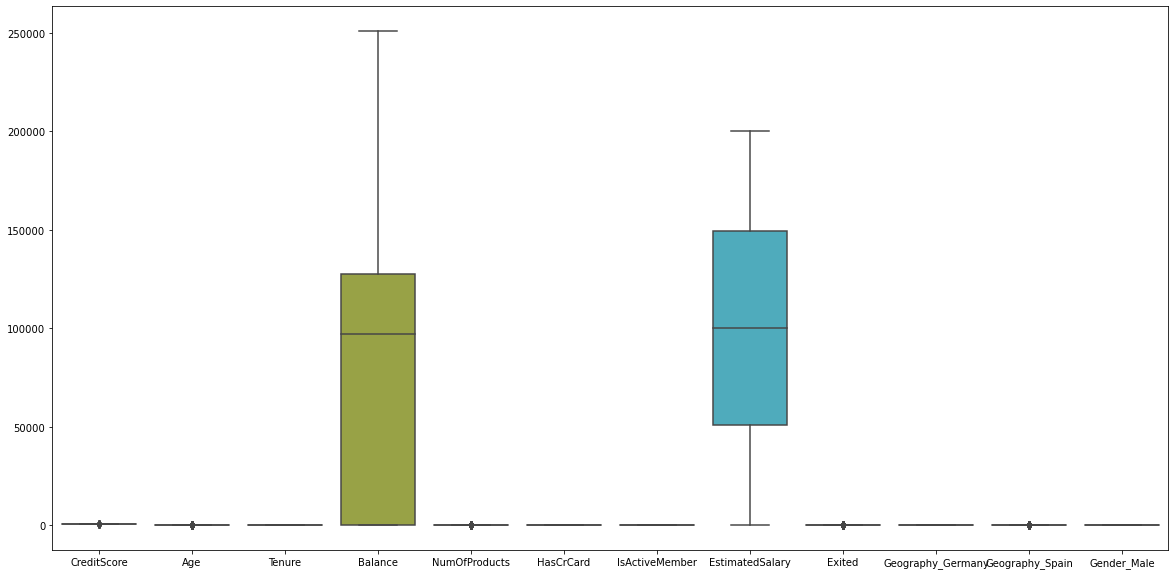

In [16]:
# Using boxplot to show the dataframe 

ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_edit_final)

##### Balance and EstimatedSalary column's range are much hihger than the others, normalization is necessary

In [17]:
#Dividing the dataset 

X = df_edit_final.drop(['Exited'], axis=1)
y = df_edit_final['Exited']

#### Scaling the dataset

In [18]:
# MinMaxScaler for min-max normalization

minMaxScaler = MinMaxScaler().fit(X)
X_processed = minMaxScaler.transform(X)

df_processed = pd.DataFrame(X_processed, columns=X.columns)
df_processed

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,0.0,0.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0


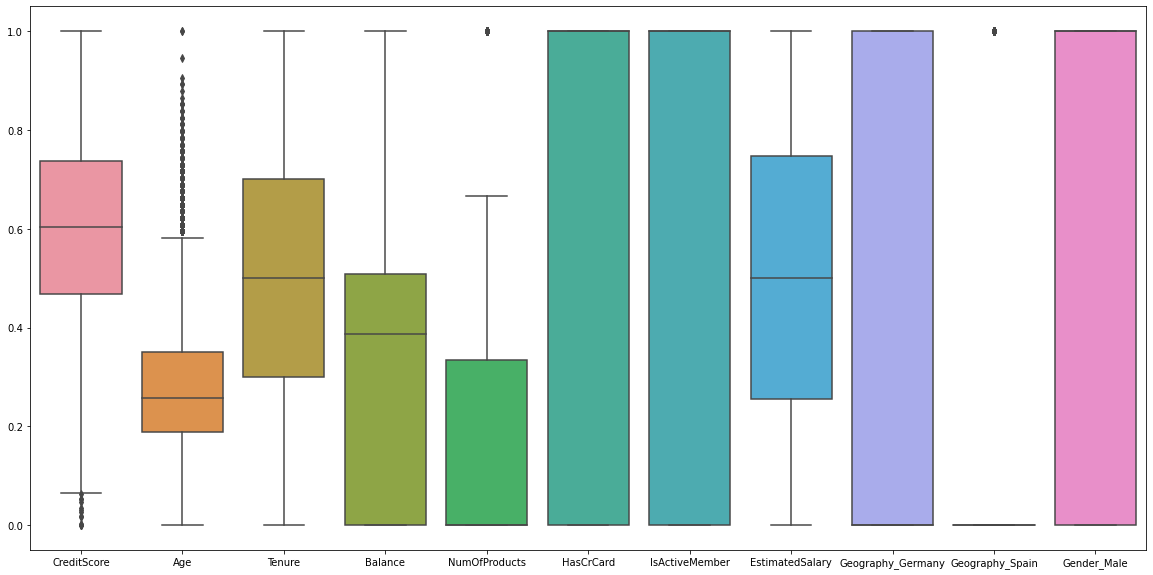

In [19]:
# Showing the boxplot after min-max normalization

ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_processed)

##### All columns are the same range

In [20]:
#Separating the dataset to training and testing data

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state = 0)

X_train.shape
X_test.shape

##### X_train.shape #(8000,11)
##### X_test.shape #(2000,11)

##### For the first prediction, let's use the Random Forest Classifier searching for the best parameters using the GridSearchCV function:

In [21]:
# Using Random Forest Classifier

parameters = {'criterion': ['gini', 'entropy'], 'n_estimators': [50, 100, 300, 500]}

rfc = RandomForestClassifier()

search_rfc = GridSearchCV(rfc, parameters, cv = 5).fit(X_train, y_train)


In [22]:
# Showing the best parameters

search_rfc.best_params_


{'criterion': 'gini', 'n_estimators': 500}

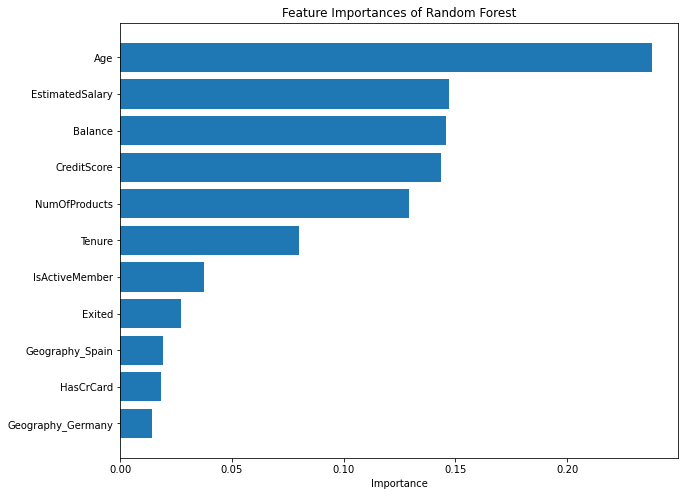

In [23]:
# Summarizing RandomForestClassifier calculated permutation feature importance

model_rfc = RandomForestClassifier(**search_rfc.best_params_).fit(X_train, y_train)

importances = model_rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 8))
plt.title('Feature Importances of Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

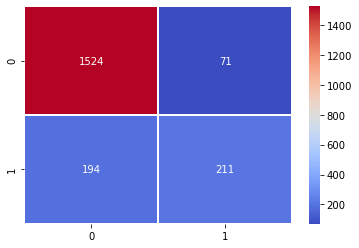

In [24]:
# Showing confusion matrix heatmap

y_pred = model_rfc.predict(X_test)
cm_rfc=confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rfc,cmap='coolwarm',annot=True,linewidth=1,fmt='d')
plt.show()

In [25]:
# Finding the accuracy score 

print(classification_report(y_test,y_pred))
print('The accuracy score is: ',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

The accuracy score is:  0.8675


In [26]:
# Using Logistic Regression

parameters = {'C': [0.01, 0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': range(50,150)}

lr = LogisticRegression()

search_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train, y_train)


In [27]:
# Showing the best parameters

search_lr.best_params_


{'C': 1, 'max_iter': 50, 'solver': 'newton-cg'}

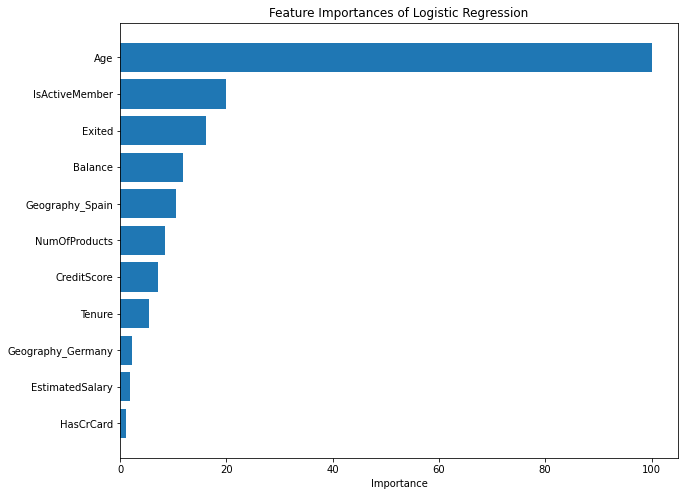

In [28]:
# Summarizing Logistic Regression calculated permutation feature importance

model_lr = LogisticRegression(**search_lr.best_params_).fit(X_train, y_train)

importances = abs(model_lr.coef_[0])
importances = 100.0 * (importances / importances.max())
indices = np.argsort(importances)

plt.figure(figsize = (10, 8))
plt.title('Feature Importances of Logistic Regression')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

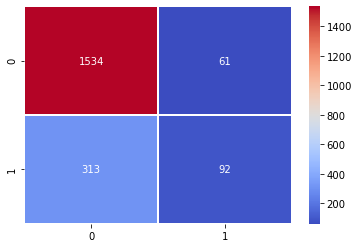

In [29]:
# Showing confusion matrix heatmap

y_pred = model_lr.predict(X_test)
cm_lr=confusion_matrix(y_test,y_pred)
sns.heatmap(cm_lr,cmap='coolwarm',annot=True,linewidth=1,fmt='d')
plt.show()

In [30]:
# Finding the accuracy score 

print(classification_report(y_test,y_pred))
print('The accuracy score is: ',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.60      0.23      0.33       405

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000

The accuracy score is:  0.813


In [31]:
# Using Gradient Boosting Classifier

parameters = {'max_depth': [2, 3, 4, 6, 10, 15], 'n_estimators': [50, 100, 300, 500]}

gbc = GradientBoostingClassifier()

search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = 10, verbose = 1).fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   34.1s
[Parallel(n_jobs=10)]: Done 120 out of 120 | elapsed:  9.4min finished


In [32]:
# Showing the best parameters

search_gbc.best_params_


{'max_depth': 3, 'n_estimators': 300}

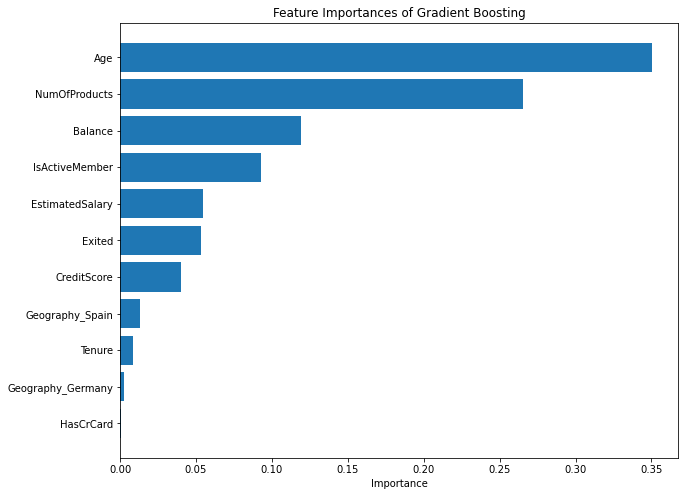

In [33]:
# Summarizing GradientBoostingClassifier calculated permutation feature importance

model_gbc = GradientBoostingClassifier(**search_gbc.best_params_).fit(X_train, y_train)

importances = model_gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 8))
plt.title('Feature Importances of Gradient Boosting')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

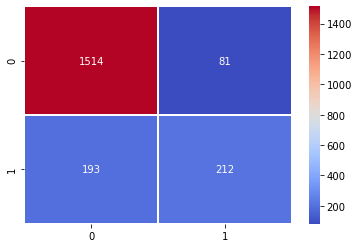

In [34]:
# Showing confusion matrix heatmap

y_pred = model_gbc.predict(X_test)
cm_gbc=confusion_matrix(y_test,y_pred)
sns.heatmap(cm_gbc,cmap='coolwarm',annot=True,linewidth=1,fmt='d')
plt.show()

In [35]:
# Finding the accuracy score 

print(classification_report(y_test,y_pred))
print('The accuracy score is: ',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.72      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

The accuracy score is:  0.863


### Summary the accuracy score of those model

##### Random Forest accuracy score is: 0.868
##### Logistic Regression accuracy score is: 0.813
##### Gradient Boosting accuracy score is: 0.863

##### Looking into the accuracy score for those algorithms are pretty good. Even logistic regression is the lowest accuracy score, it has 81.3%. The accuracy score of random forest and gradient boosting are very closed that are 86.75% and 86.3%. So random forest is slightly better than gradient boosting.